In [30]:
# Import Library
import pandas as pd

# Load the dataset
df_debt = pd.read_csv('debtData.csv')

# Show info
print(df_debt.info())

# Print the count of null values per column
print("\nCount of null values per column:")
print(df_debt.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       850 non-null    int64  
 1   Age              850 non-null    int64  
 2   EducationLevel   850 non-null    int64  
 3   YearsEmployed    850 non-null    int64  
 4   Income           850 non-null    int64  
 5   CardDebt         850 non-null    float64
 6   OtherDebt        850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB
None

Count of null values per column:
CustomerID           0
Age                  0
EducationLevel       0
YearsEmployed        0
Income               0
CardDebt             0
OtherDebt            0
Defaulted          150
DebtIncomeRatio      0
dtype: int64


In [31]:
# Drop rows where 'Defaulted' is null (if it's a target/label column)
df_debt = df_debt.dropna()

# Show a preview
df_debt.head()

,CustomerID,Age,EducationLevel,YearsEmployed,Income,CardDebt,OtherDebt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [32]:
df_debt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 0 to 849
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       700 non-null    int64  
 1   Age              700 non-null    int64  
 2   EducationLevel   700 non-null    int64  
 3   YearsEmployed    700 non-null    int64  
 4   Income           700 non-null    int64  
 5   CardDebt         700 non-null    float64
 6   OtherDebt        700 non-null    float64
 7   Defaulted        700 non-null    float64
 8   DebtIncomeRatio  700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 54.7 KB


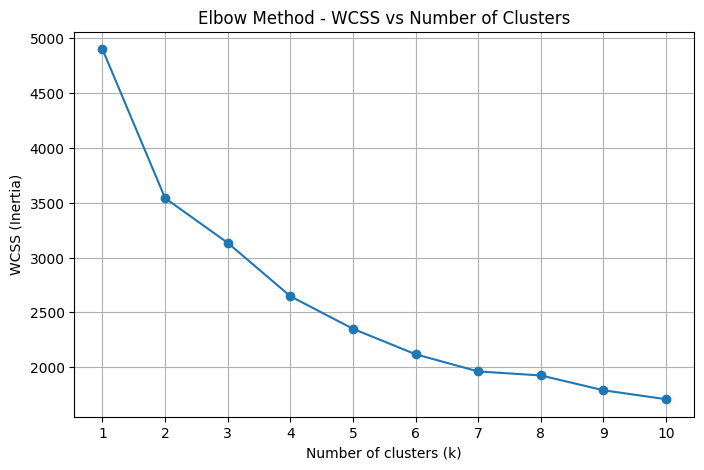

In [33]:
# Import Libraries
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select features for clustering
features = ['Age', 'EducationLevel', 'YearsEmployed', 'Income',
            'CardDebt', 'OtherDebt', 'DebtIncomeRatio']
X = df_debt[features]

# Standardize the features
d = StandardScaler().fit_transform(X)

# Elbow Method (WCSS)
wcss = []
ks = range(1, 11)

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(d)
    wcss.append(kmeans.inertia_)

# Plot the elbow
plt.figure(figsize=(8, 5))
plt.plot(ks, wcss, marker='o')
plt.title('Elbow Method - WCSS vs Number of Clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(ks)
plt.grid(True)
plt.show()

Silhouette Scores:
k = 2, silhouette score = 0.3723
k = 3, silhouette score = 0.2733
k = 4, silhouette score = 0.2376
k = 5, silhouette score = 0.2456
k = 6, silhouette score = 0.2188
k = 7, silhouette score = 0.2085
k = 8, silhouette score = 0.2150
k = 9, silhouette score = 0.2112
k = 10, silhouette score = 0.1903


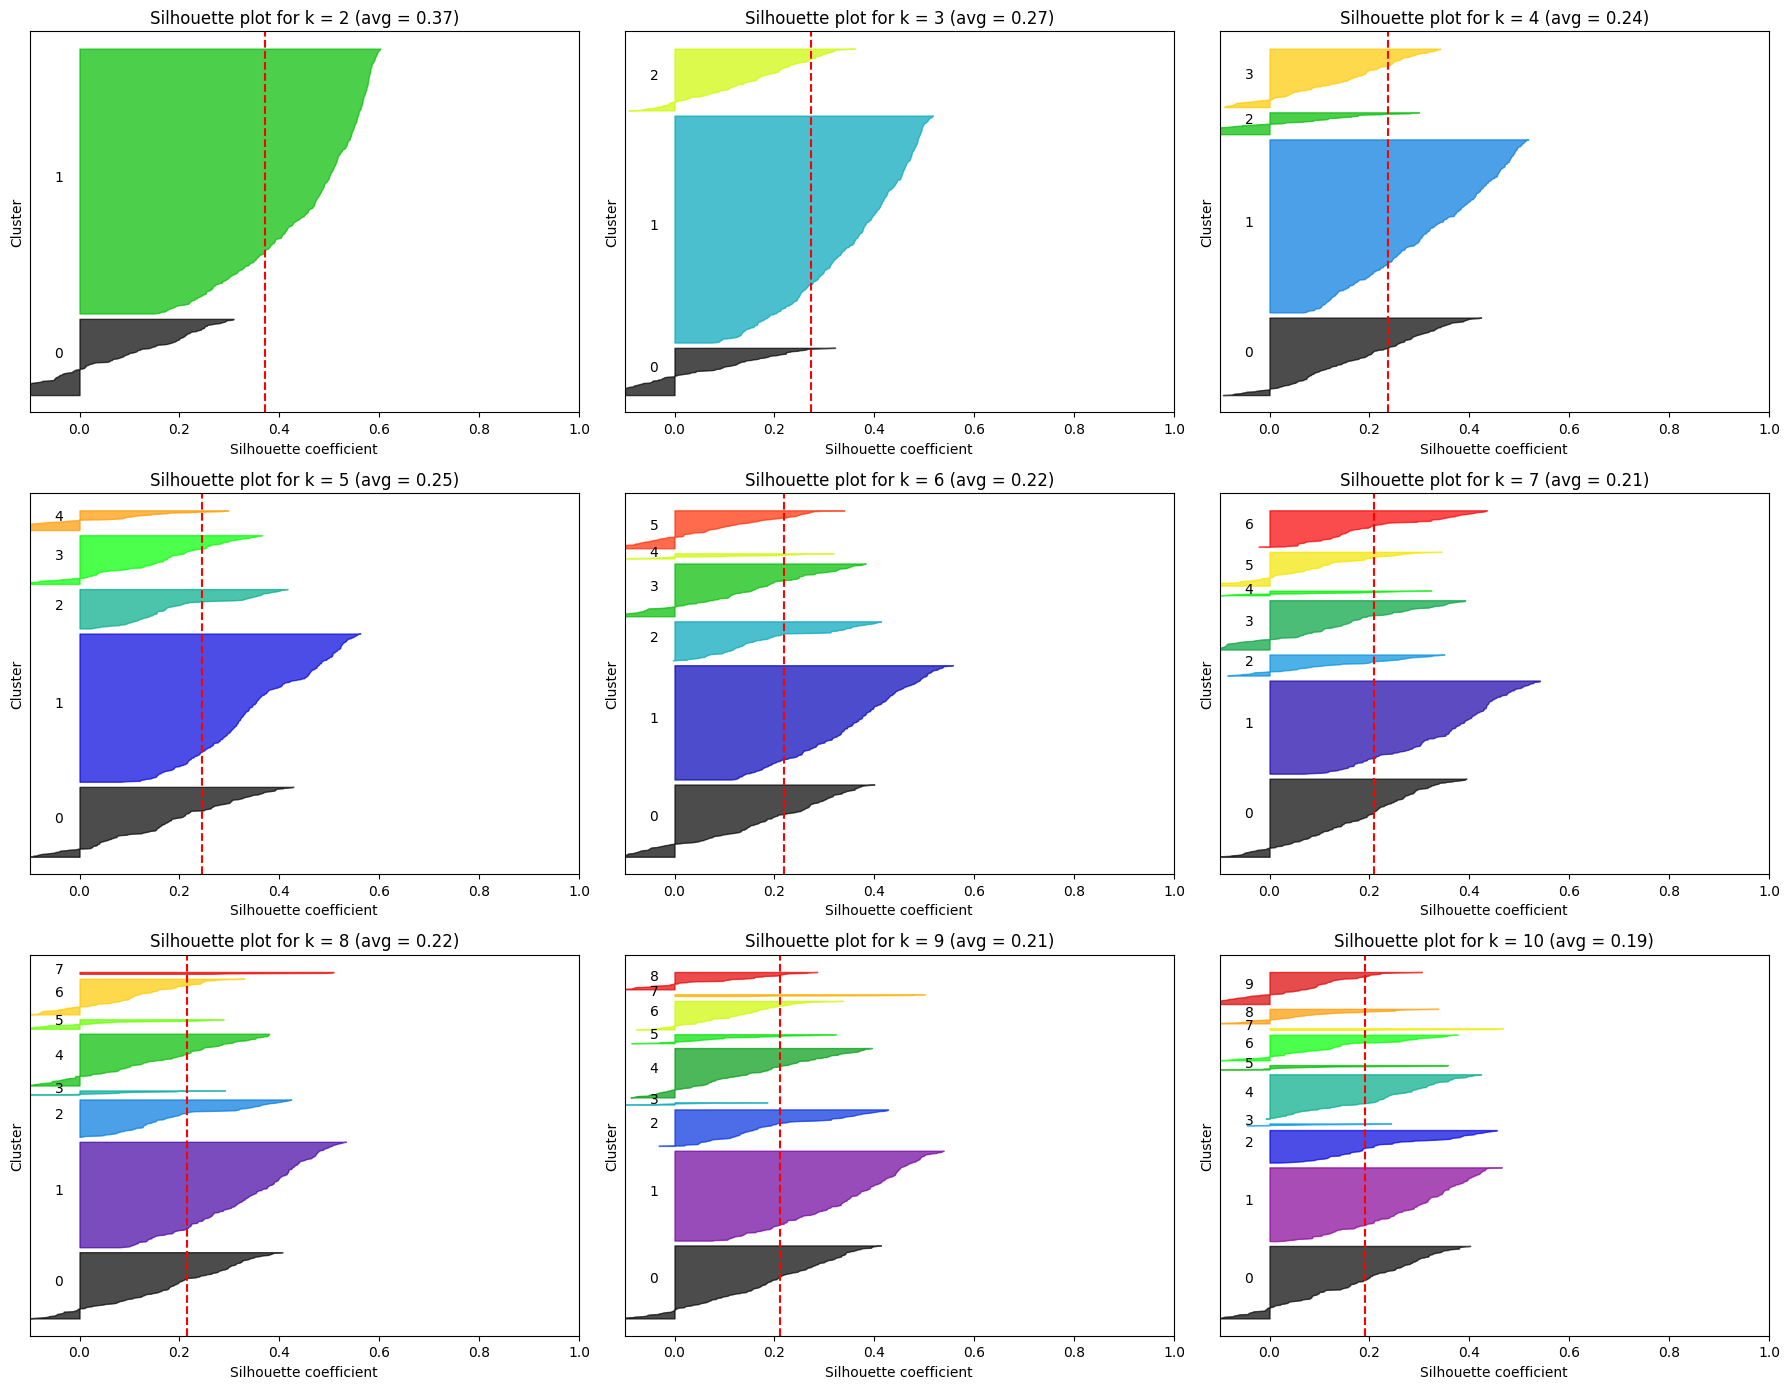

done


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# --------------------------
# Load and prepare the data
# --------------------------
features = ['Age', 'EducationLevel', 'YearsEmployed', 'Income', 'CardDebt', 'OtherDebt', 'DebtIncomeRatio']
X = df_debt[features]

# Standardize the features
scaled_data = StandardScaler().fit_transform(X)

# -------------------------------
# Silhouette score for each k (2–10)
# -------------------------------
print("Silhouette Scores:")
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    silhouette_scores.append(score)
    print(f"k = {k}, silhouette score = {score:.4f}")

# -----------------------------------------
# Silhouette plots for each k in a 3x3 grid
# -----------------------------------------
fig, axes = plt.subplots(3, 3, figsize=(18, 14))
axes = axes.flatten()

for idx, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    sil_vals = silhouette_samples(scaled_data, labels)

    ax = axes[idx]
    y_lower = 10
    for i in range(k):
        ith_cluster_vals = sil_vals[labels == i]
        ith_cluster_vals.sort()
        size_i = ith_cluster_vals.shape[0]
        y_upper = y_lower + size_i
        color = plt.cm.nipy_spectral(float(i) / k)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_vals,
                         facecolor=color, edgecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5 * size_i, str(i))
        y_lower = y_upper + 10

    avg_score = np.mean(sil_vals)
    ax.axvline(x=avg_score, color="red", linestyle="--")
    ax.set_title(f"Silhouette plot for k = {k} (avg = {avg_score:.2f})")
    ax.set_xlim([-0.1, 1])
    ax.set_yticks([])
    ax.set_xlabel("Silhouette coefficient")
    ax.set_ylabel("Cluster")

# Remove any unused subplot
for i in range(len(k_values), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()
print("done")

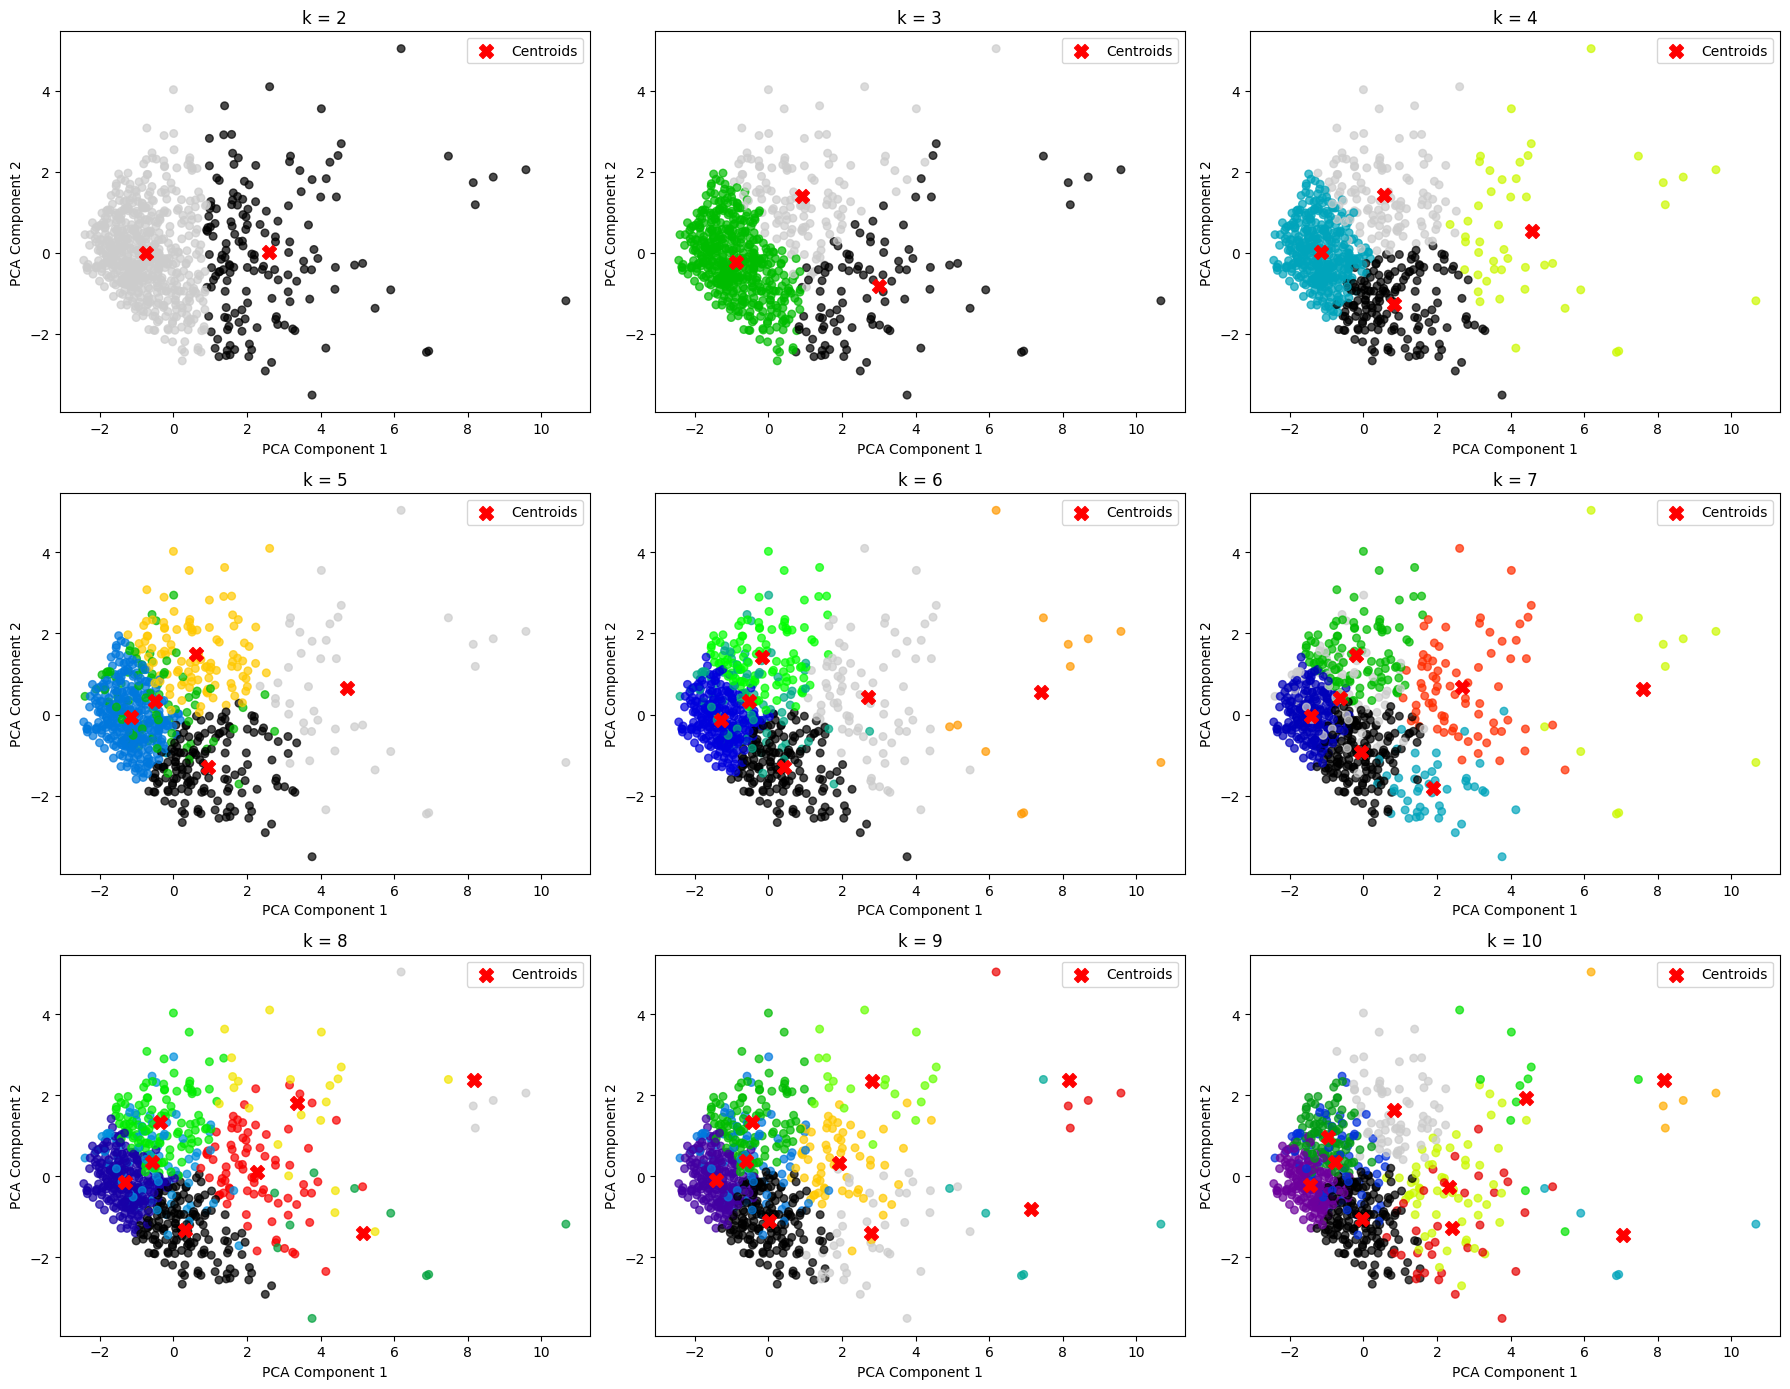

done


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Prepare data
features = ['Age', 'EducationLevel', 'YearsEmployed', 'Income', 'CardDebt', 'OtherDebt', 'DebtIncomeRatio']
X = df_debt[features]
d = StandardScaler().fit_transform(X)

# Reduce dimensions once (same projection for all plots)
pca = PCA(n_components=2)
d_2d = pca.fit_transform(d)

# Set up subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 14))
axes = axes.flatten()

for idx, k in enumerate(range(2, 11)):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(d)
    centroids_2d = pca.transform(kmeans.cluster_centers_)

    ax = axes[idx]
    scatter = ax.scatter(d_2d[:, 0], d_2d[:, 1], c=labels, cmap='nipy_spectral', s=30, alpha=0.7)
    ax.scatter(centroids_2d[:, 0], centroids_2d[:, 1], c='red', s=100, marker='X', label='Centroids')
    ax.set_title(f'k = {k}')
    ax.set_xlabel('PCA Component 1')
    ax.set_ylabel('PCA Component 2')
    ax.legend()

# Remove unused subplot if any
for i in range(len(range(2, 11)), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()
print("done")


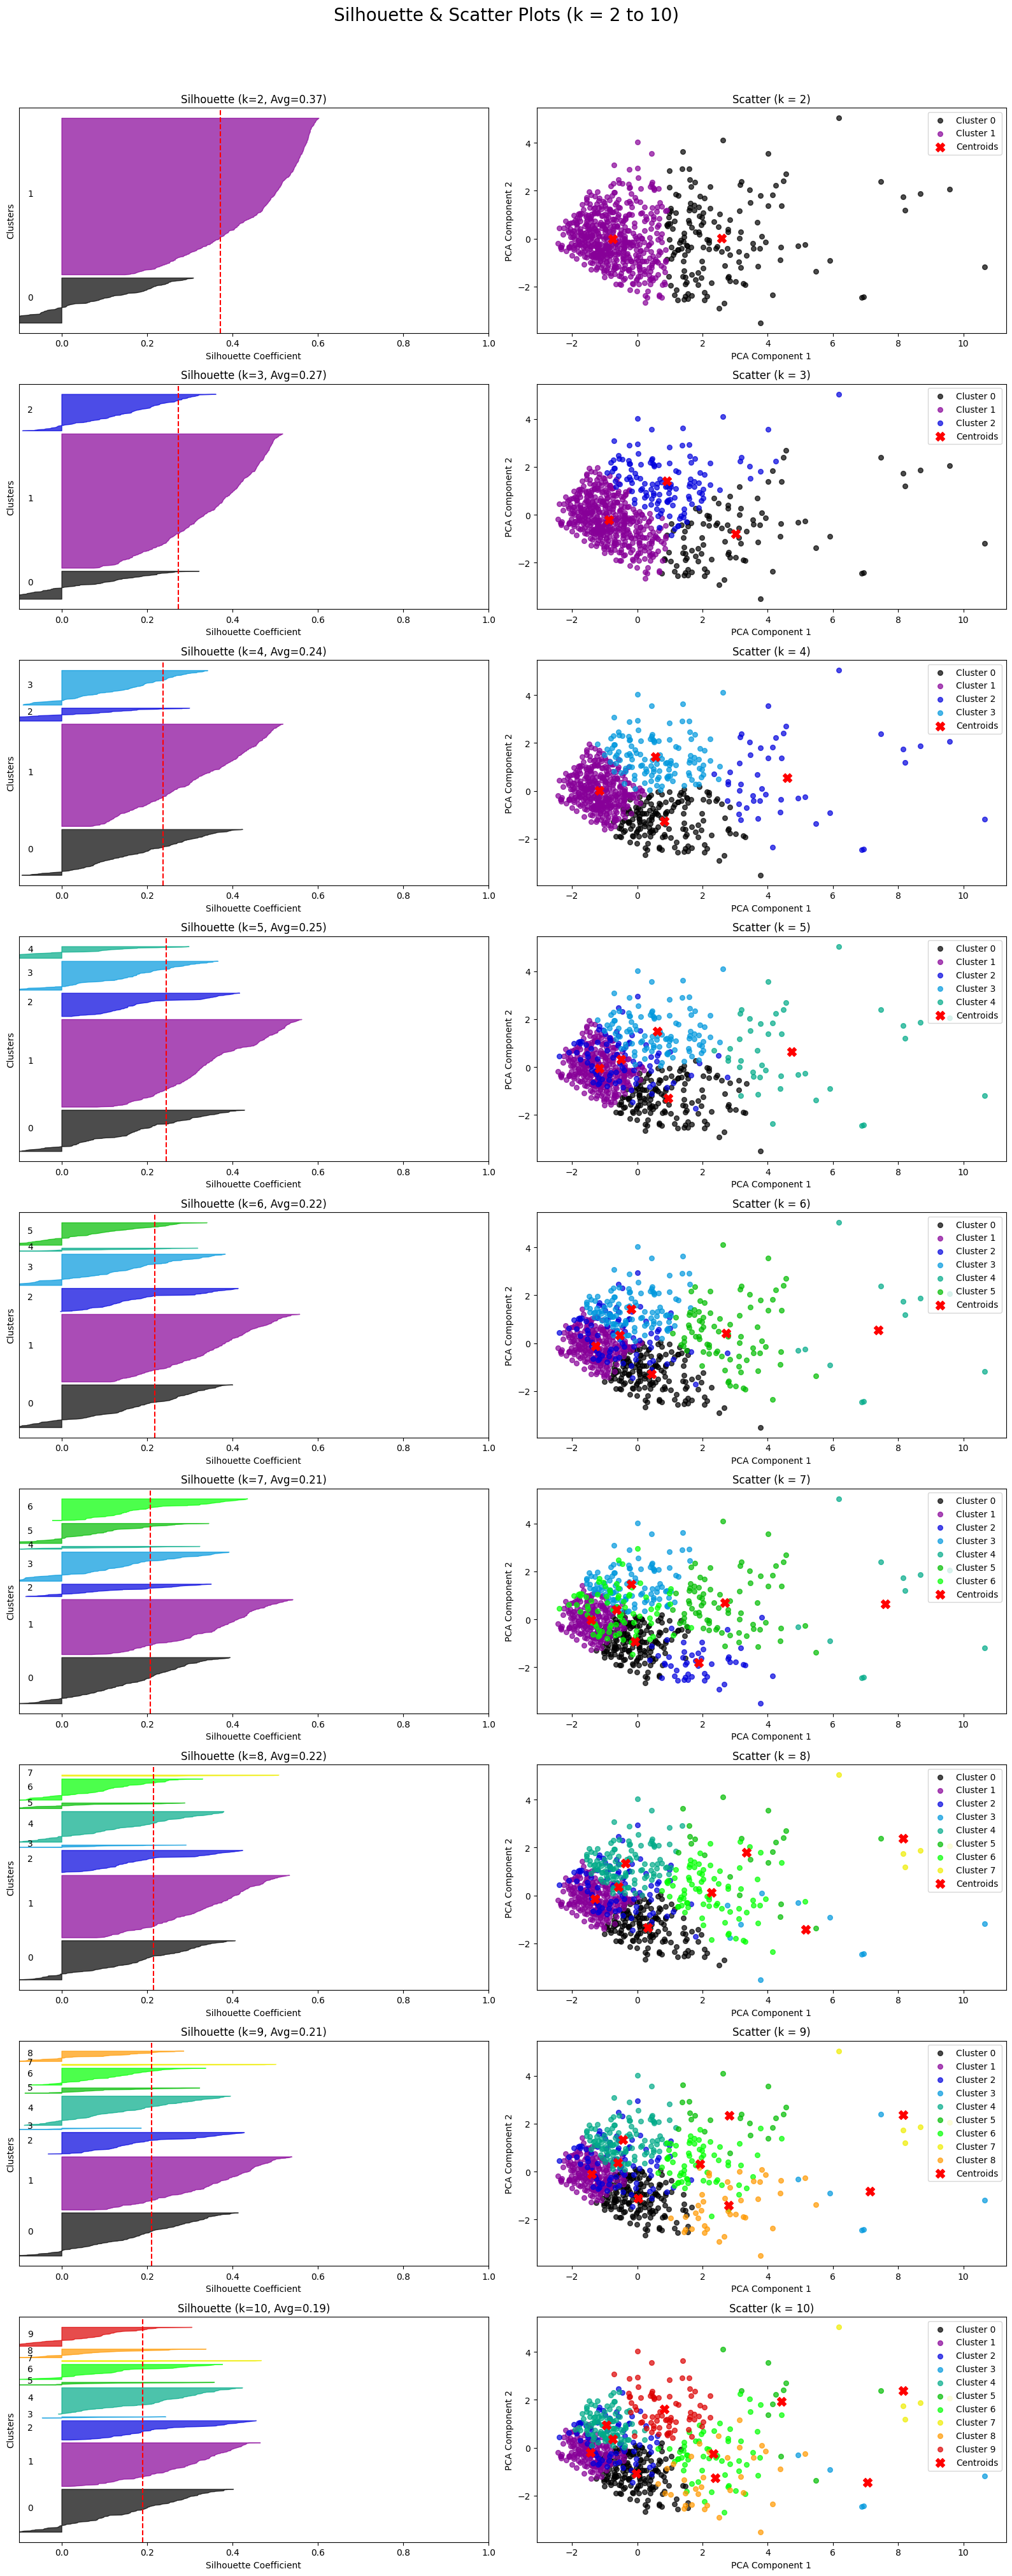

done


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples

# Prepare data
features = ['Age', 'EducationLevel', 'YearsEmployed', 'Income', 'CardDebt', 'OtherDebt', 'DebtIncomeRatio']
X = df_debt[features]
d = StandardScaler().fit_transform(X)

# PCA reduction
pca = PCA(n_components=2)
d_2d = pca.fit_transform(d)

# Setup subplots
fig, axes = plt.subplots(9, 2, figsize=(16, 40))
fig.suptitle('Silhouette & Scatter Plots (k = 2 to 10)', fontsize=20, y=1.01)

# Fixed color map with max_k clusters
max_k = 10
cmap = plt.cm.nipy_spectral
colors = [cmap(float(i) / max_k) for i in range(max_k)]  # consistent color mapping

for idx, k in enumerate(range(2, 11)):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(d)
    centroids_2d = pca.transform(kmeans.cluster_centers_)

    # --- Silhouette Plot ---
    ax_silhouette = axes[idx, 0]
    silhouette_vals = silhouette_samples(d, labels)
    y_lower = 10
    for i in range(k):
        ith_vals = silhouette_vals[labels == i]
        ith_vals.sort()
        size_i = ith_vals.shape[0]
        y_upper = y_lower + size_i
        color = colors[i]  # fixed color from consistent list
        ax_silhouette.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_vals,
                                    facecolor=color, edgecolor=color, alpha=0.7)
        ax_silhouette.text(-0.08, y_lower + 0.5 * size_i, str(i))
        y_lower = y_upper + 10

    avg_score = np.mean(silhouette_vals)
    ax_silhouette.axvline(x=avg_score, color="red", linestyle="--")
    ax_silhouette.set_title(f"Silhouette (k={k}, Avg={avg_score:.2f})")
    ax_silhouette.set_xlim([-0.1, 1])
    ax_silhouette.set_yticks([])
    ax_silhouette.set_xlabel("Silhouette Coefficient")
    ax_silhouette.set_ylabel("Clusters")

    # --- Scatter Plot ---
    ax_scatter = axes[idx, 1]
    for i in range(k):
        ax_scatter.scatter(
            d_2d[labels == i, 0],
            d_2d[labels == i, 1],
            s=30,
            color=colors[i],
            alpha=0.7,
            label=f"Cluster {i}"
        )
    ax_scatter.scatter(centroids_2d[:, 0], centroids_2d[:, 1], c='red', s=100, marker='X', label='Centroids')
    ax_scatter.set_title(f"Scatter (k = {k})")
    ax_scatter.set_xlabel("PCA Component 1")
    ax_scatter.set_ylabel("PCA Component 2")
    ax_scatter.legend(loc='best')

plt.tight_layout()
plt.subplots_adjust(top=0.97)
plt.show()
print("done")


In [37]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Function to compute and print metrics
def evaluate_k(k, data):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data)

    sil_score = silhouette_score(data, labels)
    inertia = kmeans.inertia_
    ch_score = calinski_harabasz_score(data, labels)
    db_score = davies_bouldin_score(data, labels)

    print(f"--- Performance Metrics for k = {k} ---")
    print(f"Silhouette Score         : {sil_score:.4f}")
    print(f"Inertia (WSS)            : {inertia:.2f}")
    print(f"Calinski-Harabasz Index  : {ch_score:.2f}")
    print(f"Davies-Bouldin Index     : {db_score:.4f}")
    print()

# Evaluate for k = 2, 3, 4
for k in [2, 3, 4]:
    evaluate_k(k, d)


--- Performance Metrics for k = 2 ---
Silhouette Score         : 0.3723
Inertia (WSS)            : 3541.72
Calinski-Harabasz Index  : 267.69
Davies-Bouldin Index     : 1.3906

--- Performance Metrics for k = 3 ---
Silhouette Score         : 0.2733
Inertia (WSS)            : 3133.91
Calinski-Harabasz Index  : 196.39
Davies-Bouldin Index     : 1.5423

--- Performance Metrics for k = 4 ---
Silhouette Score         : 0.2376
Inertia (WSS)            : 2646.97
Calinski-Harabasz Index  : 197.47
Davies-Bouldin Index     : 1.3667



In [ ]:
# Descriptive analysis for k=2 clusters
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load and prepare data
df_debt = pd.read_csv('debtData.csv')
df_debt = df_debt.dropna(subset=['Defaulted'])
features = ['Age', 'EducationLevel', 'YearsEmployed', 'Income', 'CardDebt', 'OtherDebt', 'DebtIncomeRatio']
X = df_debt[features]
scaler = StandardScaler()
d_scaled = scaler.fit_transform(X)

# Fit k=2 model
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(d_scaled)
df_debt['cluster'] = clusters



# Summary statistics by cluster
summary_df = df_debt.groupby('cluster')[features].mean().reset_index()
summary_df

# Boxplots for key features
to_plot = ['Income', 'CardDebt', 'DebtIncomeRatio']
for col in to_plot:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='cluster', y=col, data=df_debt)
    plt.title('Distribution of ' + col + ' by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(col)
    plt.show()



In [41]:
# Compute cluster centers in original scale
centers_scaled = kmeans.cluster_centers_
centers = scaler.inverse_transform(centers_scaled)
centers_df = pd.DataFrame(centers, columns=features)
centers_df['cluster'] = [0,1]
centers_df

,Age,EducationLevel,YearsEmployed,Income,CardDebt,OtherDebt,DebtIncomeRatio,cluster
0,41.878981,1.961783,15.624204,88.866242,3.891573,7.296497,14.691720,0
1,32.830571,1.653775,6.296501,33.092081,0.877567,1.832757,8.979374,1


In [42]:
# Summary statistics by cluster
summary_df = df_debt.groupby('cluster')[features].mean().reset_index()
summary_df

,cluster,Age,EducationLevel,YearsEmployed,Income,CardDebt,OtherDebt,DebtIncomeRatio
0,0,41.878981,1.961783,15.624204,88.866242,3.891573,7.296497,14.691720
1,1,32.830571,1.653775,6.296501,33.092081,0.877567,1.832757,8.979374


In [50]:
# Count and percentage of data points in each cluster
cluster_counts = df_debt['cluster'].value_counts()
cluster_percentages = (cluster_counts / len(df_debt)) * 100

# Combine counts and percentages into one DataFrame
cluster_summary = pd.DataFrame({
    'Count': cluster_counts,
    'Percentage': cluster_percentages.round(2).astype(str) + ' %'
})


cluster_summary


,Count,Percentage
cluster,,
1,543,77.57 %
0,157,22.43 %
